In [1]:
pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import cv2
import imghdr

In [6]:
data_dir = "data" 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2538 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

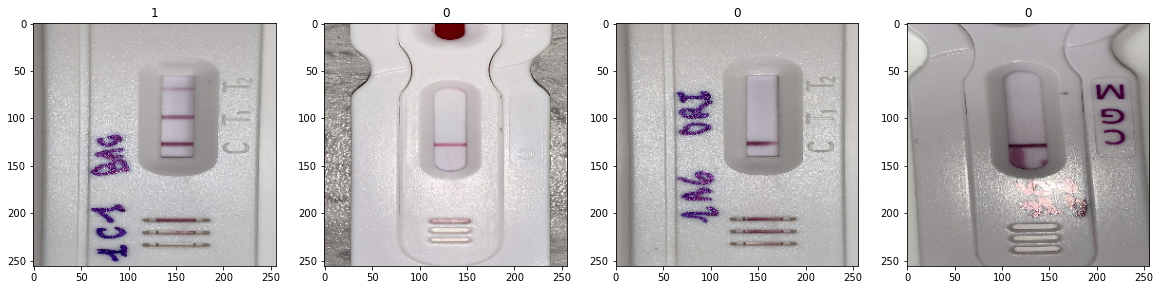

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
#scale data
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [15]:
data.as_numpy_iterator().next()

(array([[[[0.78431374, 0.9019608 , 0.7607843 ],
          [0.7823529 , 0.9       , 0.7588235 ],
          [0.7823529 , 0.9       , 0.7588235 ],
          ...,
          [0.7294118 , 0.84705883, 0.69803923],
          [0.7235294 , 0.84117645, 0.69215685],
          [0.73333335, 0.84313726, 0.69411767]],
 
         [[0.78431374, 0.9019608 , 0.7607843 ],
          [0.78431374, 0.9019608 , 0.7607843 ],
          [0.78039217, 0.8980392 , 0.75686276],
          ...,
          [0.7392157 , 0.845098  , 0.7078431 ],
          [0.7411765 , 0.8509804 , 0.7019608 ],
          [0.7372549 , 0.84705883, 0.69803923]],
 
         [[0.78431374, 0.9019608 , 0.7607843 ],
          [0.78039217, 0.8980392 , 0.75686276],
          [0.78431374, 0.9019608 , 0.7607843 ],
          ...,
          [0.73333335, 0.8392157 , 0.7019608 ],
          [0.7352941 , 0.84117645, 0.70392156],
          [0.7254902 , 0.84313726, 0.7019608 ]],
 
         ...,
 
         [[0.80588233, 0.92745095, 0.7627451 ],
          [0.80588

In [16]:
#Split Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

56

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
#Build Deep Learning Model
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [25]:
#train

logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [27]:
hist = model.fit(train, epochs=12, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/12
56/56 [==============================] - 116s 2s/step - loss: 0.7091 - accuracy: 0.5820 - val_loss: 0.6864 - val_accuracy: 0.5820
Epoch 2/12
56/56 [==============================] - 85s 1s/step - loss: 0.6333 - accuracy: 0.6417 - val_loss: 0.6087 - val_accuracy: 0.6602
Epoch 3/12
56/56 [==============================] - 76s 1s/step - loss: 0.5358 - accuracy: 0.7037 - val_loss: 0.5914 - val_accuracy: 0.6270
Epoch 4/12
56/56 [==============================] - 80s 1s/step - loss: 0.4749 - accuracy: 0.7489 - val_loss: 0.4356 - val_accuracy: 0.7988
Epoch 5/12
56/56 [==============================] - 82s 1s/step - loss: 0.4134 - accuracy: 0.7974 - val_loss: 0.5216 - val_accuracy: 0.7520
Epoch 6/12
56/56 [==============================] - 76s 1s/step - loss: 0.3254 - accuracy: 0.8488 - val_loss: 0.2906 - val_accuracy: 0.8574
Epoch 7/12
56/56 [==============================] - 75s 1s/step - loss: 0.2688 - accuracy: 0.8761 - val_loss: 0.2800 - val_accuracy: 0.8750
Epoch 8/12
56/56 [=

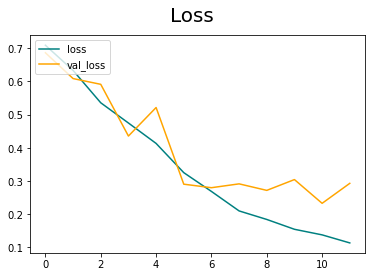

In [28]:
#performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

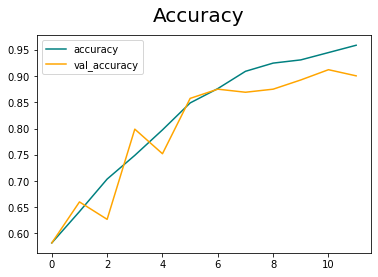

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:
#evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 342ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.85555553, shape=(), dtype=float32) tf.Tensor(0.89534885, shape=(), dtype=float32) tf.Tensor(0.9059829, shape=(), dtype=float32)


In [34]:
import cv2

1/1 [==============================] - 0s 58ms/step


array([[0.998837]], dtype=float32)

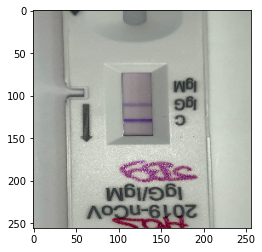

In [35]:
img = cv2.imread('data/Positive/JPEG image-1CAFEC0D1AF5-1.jpeg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat


In [36]:
if yhat > 0.5: 
    print(f'Result is positive')
else:
    print(f'Negative')

Result is positive


In [39]:

# serialize weights to HDF5
model.save("model.h5")
